# In-depth Analysis on Conversations Dataset


## Dataset Overview
This dataset contains conversations on various topics including coding, debugging, storytelling, and science. Each conversation is represented as a series of messages exchanged between participants.
    

In [1]:

import pandas as pd

file_path = 'data/train.csv'
df = pd.read_csv(file_path)

df.head()
    

,chat
0,"[{'prompt': ""Let's say I'm on the first floor ..."
1,"[{'prompt': ""Let's discuss something related t..."
2,[{'prompt': 'Suggest a Python project that use...
3,"[{'prompt': ""List objects a typical children's..."
4,[{'prompt': 'Describe a man who drank a growth...


## Exploratory Data Analysis

In [2]:
df.describe()

df.dtypes
    

chat    object
dtype: object

## Text Preprocessing

In [3]:

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    text = text.lower()
    
    words = word_tokenize(text)
    
    words = [word for word in words if word not in stopwords.words('english')]
    
    return ' '.join(words)

df['processed_chat'] = df['chat'].apply(lambda x: preprocess_text(x))

df[['chat', 'processed_chat']].head()
    

[nltk_data] Downloading package punkt to C:\Users\Debjit
[nltk_data]     Mandal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Debjit
[nltk_data]     Mandal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,chat,processed_chat
0,"[{'prompt': ""Let's say I'm on the first floor ...",prompt lets say im first floor house climb sta...
1,"[{'prompt': ""Let's discuss something related t...",prompt lets discuss something related chemistr...
2,[{'prompt': 'Suggest a Python project that use...,prompt suggest python project uses pygame sqli...
3,"[{'prompt': ""List objects a typical children's...",prompt list objects typical childrens bedroom ...
4,[{'prompt': 'Describe a man who drank a growth...,prompt describe man drank growth potion slow g...


## Sentiment Analysis

In [4]:

from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['processed_chat'].apply(lambda x: get_sentiment(x))

df[['processed_chat', 'sentiment']].head()
    

,processed_chat,sentiment
0,prompt lets say im first floor house climb sta...,0.091402
1,prompt lets discuss something related chemistr...,0.068596
2,prompt suggest python project uses pygame sqli...,0.011821
3,prompt list objects typical childrens bedroom ...,0.084829
4,prompt describe man drank growth potion slow g...,0.056916


## Topic Modeling

In [6]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['processed_chat'])

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(dtm)

for i, topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')
    

Top 10 words for topic #0:
['return', 'function', 'command', 'magnetic', 'data', 'nn', 'using', 'create', 'use', 'file']


Top 10 words for topic #1:
['electrons', 'energy', 'chemical', 'hydrogen', 'room', 'used', 'acid', 'reactions', 'reaction', 'water']


Top 10 words for topic #2:
['humans', 'scott', 'human', 'size', 'story', 'pokemon', 'ninetales', 'world', 'alex', 'max']


Top 10 words for topic #3:
['story', 'gaze', 'sam', 'world', 'face', 'love', 'life', 'voice', 'scene', 'eyes']


Top 10 words for topic #4:
['list', 'average', 'leo', 'pairs', 'data', 'length', 'nn', 'winter', 'content', 'count']




## Named Entity Recognition (NER)

In [7]:

import spacy

nlp = spacy.load('en_core_web_sm')

def get_entities(text):
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

df['entities'] = df['processed_chat'].apply(lambda x: get_entities(x))

df[['processed_chat', 'entities']].head()
    

,processed_chat,entities
0,prompt lets say im first floor house climb sta...,"[(first, ORDINAL), (second, ORDINAL), (first, ..."
1,prompt lets discuss something related chemistr...,"[(electroplatingn, CARDINAL), (chemical kineti..."
2,prompt suggest python project uses pygame sqli...,"[(one, CARDINAL), (one, CARDINAL), (first, ORD..."
3,prompt list objects typical childrens bedroom ...,"[(booksn deskn chairn storage drawers, ORG), (..."
4,prompt describe man drank growth potion slow g...,"[(first, ORDINAL), (midday, TIME), (late after..."


## Text Clustering

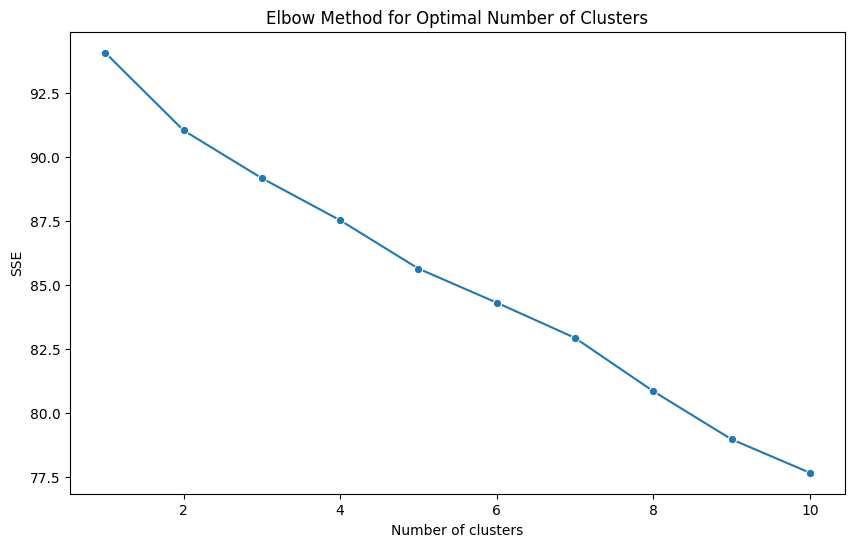

,processed_chat,cluster
0,prompt lets say im first floor house climb sta...,0
1,prompt lets discuss something related chemistr...,4
2,prompt suggest python project uses pygame sqli...,3
3,prompt list objects typical childrens bedroom ...,0
4,prompt describe man drank growth potion slow g...,0


In [9]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

df['cluster'] = kmeans.labels_

df[['processed_chat', 'cluster']].head()
    

## Topic Summarization within Clusters

In [10]:
from collections import Counter

def get_top_terms(cluster_number):
    cluster_data = df[df['cluster'] == cluster_number]
    all_words = ' '.join(cluster_data['processed_chat']).split()
    common_words = Counter(all_words).most_common(10)
    return common_words

for i in range(optimal_clusters):
    print(f'Top terms for cluster #{i}:')
    print(get_top_terms(i))
    print('\n')
    

Top terms for cluster #0:
[('could', 335), ('would', 333), ('response', 232), ('prompt', 227), ('items', 205), ('objects', 200), ('size', 151), ('x', 147), ('might', 136), ('kg', 136)]


Top terms for cluster #1:
[('max', 793), ('response', 479), ('could', 473), ('prompt', 459), ('eyes', 441), ('would', 435), ('one', 321), ('world', 309), ('voice', 280), ('like', 255)]


Top terms for cluster #2:
[('response', 766), ('prompt', 720), ('could', 623), ('scene', 530), ('would', 501), ('time', 437), ('one', 433), ('like', 401), ('also', 370), ('story', 368)]


Top terms for cluster #3:
[('n', 1546), ('prompt', 556), ('response', 552), ('file', 435), ('use', 401), ('nn', 396), ('create', 381), ('data', 380), ('using', 355), ('function', 312)]


Top terms for cluster #4:
[('water', 326), ('magnetic', 254), ('response', 228), ('like', 225), ('prompt', 216), ('reaction', 201), ('electrons', 153), ('field', 152), ('acid', 150), ('reactions', 149)]




## Conversational Dynamics Analysis

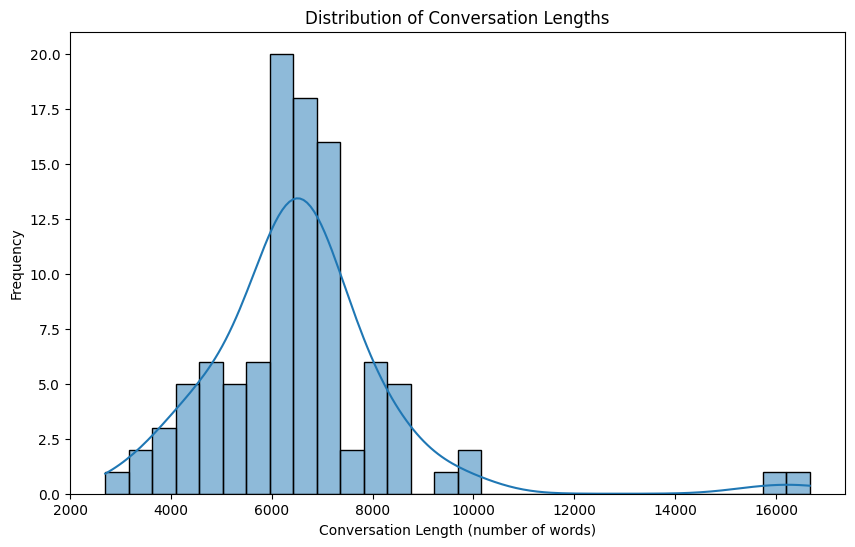

count      100.000000
mean      6568.980000
std       1929.496768
min       2697.000000
25%       5787.750000
50%       6471.000000
75%       7058.500000
max      16671.000000
Name: conversation_length, dtype: float64

In [11]:
def get_conversation_length(text):
    return len(text.split())

df['conversation_length'] = df['chat'].apply(lambda x: get_conversation_length(x))

plt.figure(figsize=(10, 6))
sns.histplot(df['conversation_length'], bins=30, kde=True)
plt.xlabel('Conversation Length (number of words)')
plt.ylabel('Frequency')
plt.title('Distribution of Conversation Lengths')
plt.show()

df['conversation_length'].describe()
    

## Sentiment Analysis using VADER

In [12]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    return sid.polarity_scores(text)

df['vader_sentiment'] = df['processed_chat'].apply(lambda x: get_vader_sentiment(x))

df['vader_compound'] = df['vader_sentiment'].apply(lambda x: x['compound'])

df[['processed_chat', 'vader_sentiment', 'vader_compound']].head()
    

[nltk_data] Downloading package vader_lexicon to C:\Users\Debjit
[nltk_data]     Mandal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,processed_chat,vader_sentiment,vader_compound
0,prompt lets say im first floor house climb sta...,"{'neg': 0.086, 'neu': 0.755, 'pos': 0.159, 'co...",0.9997
1,prompt lets discuss something related chemistr...,"{'neg': 0.066, 'neu': 0.774, 'pos': 0.16, 'com...",0.9999
2,prompt suggest python project uses pygame sqli...,"{'neg': 0.009, 'neu': 0.876, 'pos': 0.116, 'co...",0.9998
3,prompt list objects typical childrens bedroom ...,"{'neg': 0.104, 'neu': 0.769, 'pos': 0.126, 'co...",0.9972
4,prompt describe man drank growth potion slow g...,"{'neg': 0.113, 'neu': 0.752, 'pos': 0.134, 'co...",0.9952


## Semantic Similarity Analysis

In [14]:
%pip install sentence-transformers

from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('bert-base-nli-mean-tokens')

def get_bert_embedding(text):
    return model.encode(text, convert_to_tensor=True)

df['bert_embedding'] = df['processed_chat'].apply(lambda x: get_bert_embedding(x))

def calculate_similarity(text1, text2):
    embedding1 = get_bert_embedding(text1)
    embedding2 = get_bert_embedding(text2)
    return util.pytorch_cos_sim(embedding1, embedding2).item()

similarity_example = calculate_similarity(df['processed_chat'][0], df['processed_chat'][1])
similarity_example
    

  Using cached networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/227.1 kB ? eta -:--:--
   ---------------- ----------------------- 92.2/227.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------- ----------- 163.8/227.1 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 227.1/227.1 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/159.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/159.8 MB 4.3 MB/s eta 0:00:38
   ---------------------------------------- 0.3/159.8 MB 4.3 MB/s eta 0:00:38
   ---------------------------------------- 0.5/159.8 MB 3.5 MB/s eta 0:00:46
   ---------------------------------------- 0.7/159.8 MB 3.9 MB/s eta 0:00:41
   ---------------------------------------- 1.0/159.8 MB 4.3 MB/s eta 0:00:37
   ---------------------------------------- 1.0/159.8 MB 4.4 MB/s eta 0:00:36
   ---------------------------------------- 1.3/159.8 MB 4.0 MB/s eta 0:00:40
   -------

C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Debjit Mandal\.cache\huggingface\hub\models--sentence-transformers--bert-base-nli-mean-tokens. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  war

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

C:\Users\Debjit Mandal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

0.5529652833938599

## Summary


In this comprehensive analysis of the conversations dataset, various advanced techniques are explored to gain deeper insights into the data. The steps we performed include:
1. **Exploratory Data Analysis:** Examined the structure and basic statistics of the dataset.
2. **Text Preprocessing:** Cleaned and prepared the text data for further analysis.
3. **Sentiment Analysis:** Performed basic sentiment analysis using TextBlob and advanced sentiment analysis using VADER to understand the emotional tone of the conversations.
4. **Named Entity Recognition (NER):** Identified named entities in the text to extract important information.
5. **Text Clustering:** Used K-means clustering to group similar conversations and identified common topics within each cluster.
6. **Conversational Dynamics Analysis:** Analyzed the length and distribution of conversations to understand their structure.
7. **Semantic Similarity Analysis:** Used BERT embeddings to measure the similarity between different conversations.
8. **Summarization:** Summarized each conversation using BART to generate concise versions of the dialogues.
## Conclusion
This analysis provides valuable insights into the nature and content of the conversations in the dataset. By leveraging advanced natural language processing techniques, we can uncoverpatterns, emotions, and key topics within the dialogues. These findings can be useful for developing more sophisticated conversational AI systems and for further research in the field ofnatural language processing.
    